In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
#import seaborn as sns
import pandas as pd
import numpy as np
import itertools

In [33]:
folder = Path("results_synced/atlas_ratio/")
datasets = ["GunPoint"]#, "Coffee"]
encoders = ["CNN_DFS"]
folds = 5

dfs = []
for dataset, encoder in itertools.product(datasets, encoders):
    paths = [folder /  f"EXP_ratio_{encoder}_{dataset}_f{f}.csv" for f in range(folds)]
    paths = [p for p in paths if p.exists()] 
    dfs.append(pd.concat([pd.read_csv(p) for p in paths]))
df = pd.concat(dfs, ignore_index=True)

In [34]:
ds = "GunPoint"
df = df[df["dataset"] == ds]
df.groupby(["nsamp_tra", "nsamp_pre"]).mean()

/tmp/ipykernel_6458/3092497659.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["nsamp_tra", "nsamp_pre"]).mean()


pretrained  fold_number  random_state  batch_size  \
nsamp_tra nsamp_pre                                                      
1227      0                 0.0          0.5           0.0       128.0   
          3627              1.0          0.5           0.0       128.0   
          7254              1.0          0.5           0.0       128.0   
          10881             1.0          0.5           0.0       128.0   
          14508             1.0          0.5           0.0       128.0   
          18135             1.0          0.5           0.0       128.0   
2454      0                 0.0          0.5           0.0       128.0   
          3627              1.0          0.5           0.0       128.0   
          7254              1.0          0.5           0.0       128.0   
          10881             1.0          0.5           0.0       128.0   
          14508             1.0          0.5           0.0       128.0   
          18135             1.0          0.5           0.0       128.0   
3681      0                 0.0          0.5           0.0       128.0   
          3627              1.0          0.5           0.0       128.0   
          7254              1.0          0.5           0.0       128.0   
          10881             1.0          0.5           0.0       128.0   
          14508             1.0          0.5           0.0       128.0   
          18135             1.0          0.5           0.0       128.0   
4908      0                 0.0          0.5           0.0       128.0   
          3627              1.0          0.5           0.0       128.0   
          7254              1.0          0.5           0.0       128.0   
          10881             1.0          0.5           0.0       128.0   
          14508             1.0          0.5           0.0       128.0   
          18135             1.0          0.0           0.0       128.0   
6135      0                 0.0          0.0           0.0       128.0   
          3627              1.0          0.0           0.0       128.0   
          7254              1.0          0.0           0.0       128.0   
          10881             1.0          0.0           0.0       128.0   
          14508             1.0          0.0           0.0       128.0   
          18135             1.0          0.0           0.0       128.0   

                     window_size  target_val_acc  target_val_f1  \
nsamp_tra nsamp_pre                                               
1227      0                  5.0        0.500000       0.500000   
          3627               5.0        0.619438       0.619438   
          7254               5.0        0.597190       0.597190   
          10881              5.0        0.419204       0.419204   
          14508              5.0        0.443794       0.443794   
          18135              5.0        0.641686       0.641686   
2454      0                  5.0        0.535714       0.535714   
          3627               5.0        0.567330       0.567330   
          7254               5.0        0.612412       0.612412   
          10881              5.0        0.554450       0.554450   
          14508              5.0        0.648126       0.648126   
          18135              5.0        0.653396       0.653396   
3681      0                  5.0        0.414520       0.414520   
          3627               5.0        0.582748       0.582748   
          7254               5.0        0.545277       0.545277   
          10881              5.0        0.449649       0.449649   
          14508              5.0        0.489852       0.489852   
          18135              5.0        0.399297       0.399297   
4908      0                  5.0        0.650468       0.650468   
          3627               5.0        0.699941       0.699941   
          7254               5.0        0.707553       0.707553   
          10881              5.0        0.716335       0.716335   
          14508              5.0        0.72

In [35]:
cols = [c for c in df.columns if ("target_test" in c) or (("pretrain_val" in c) )]
xd1 = df.groupby(["nsamp_tra", "nsamp_pre"])[cols].mean()
xd2 = df.groupby(["nsamp_tra", "nsamp_pre"])[cols].std()
xd1.columns = [c + "_mean" for c in xd1.columns]
xd2.columns = [c + "_std" for c in xd2.columns]
xd = pd.concat([xd1, xd2], axis=1).reset_index()
xd.replace(np.NaN, 0, inplace=True)
xd

,nsamp_tra,nsamp_pre,target_test_acc_mean,target_test_f1_mean,target_test_auroc_mean,pretrain_val_acc_mean,pretrain_val_f1_mean,pretrain_val_auroc_mean,target_test_acc_std,target_test_f1_std,target_test_auroc_std,pretrain_val_acc_std,pretrain_val_f1_std,pretrain_val_auroc_std
0,1227,0,0.489724,0.489724,0.473257,0.000000,0.000000,0.000000,0.019140,0.019140,0.098906,0.000000,0.000000,0.000000
1,1227,3627,0.524311,0.524311,0.511077,0.698451,0.698451,0.918708,0.026465,0.026465,0.053538,0.049561,0.049561,0.026936
2,1227,7254,0.528739,0.528739,0.552402,0.782192,0.782192,0.952700,0.046432,0.046432,0.039868,0.044662,0.044662,0.011130
3,1227,10881,0.492398,0.492398,0.440793,0.839853,0.839853,0.962004,0.009452,0.009452,0.015289,0.036306,0.036306,0.014141
4,1227,14508,0.479866,0.479866,0.510004,0.852486,0.852486,0.972547,0.026701,0.026701,0.042077,0.025069,0.025069,0.002476
5,1227,18135,0.543525,0.543525,0.528603,0.859332,0.859332,0.977837,0.004017,0.004017,0.015428,0.002536,0.002536,0.000151
6,2454,0,0.514119,0.514119,0.491507,0.000000,0.000000,0.000000,0.043950,0.043950,0.071263,0.000000,0.000000,0.000000
7,2454,3627,0.510109,0.510109,0.498088,0.625917,0.625917,0.907266,0.016068,0.016068,0.008533,0.110647,0.110647,0.044947
8,2454,7254,0.519549,0.519549,0.532846,0.832111,0.832111,0.969755,0.030600,0.030600,0.031869,0.001729,0.001729,0.006273
9,2454,10881,0.523392,0.523392,0.523762,0.865662,0.865662,0.973683,0.009097,0.009097,0.017672,0.029775,0.029775,0.001532


Text(0, 0.5, 'auroc')

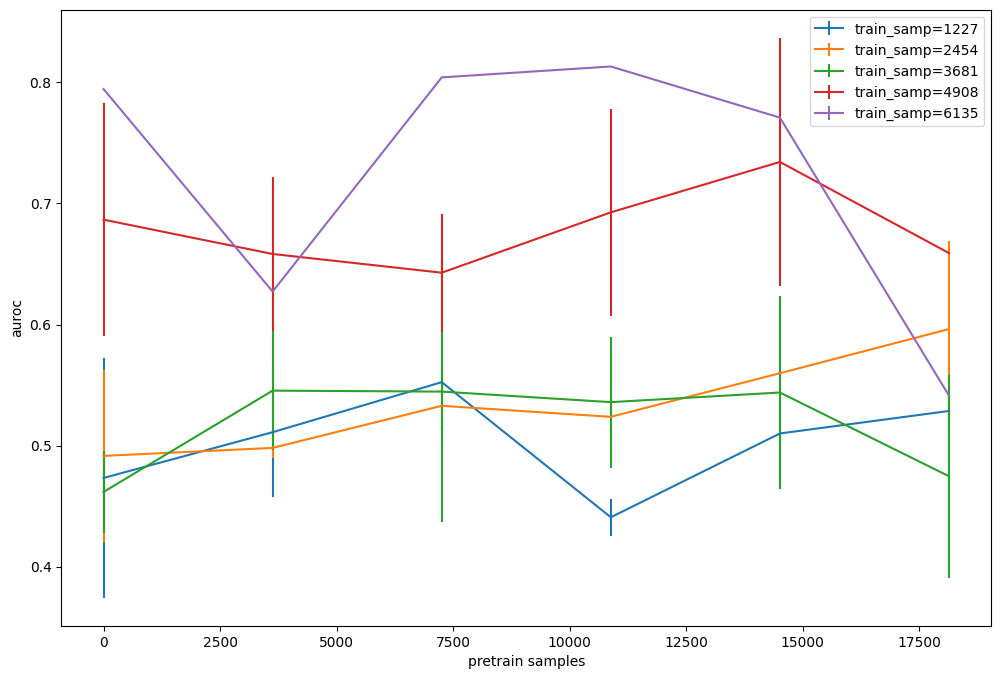

In [37]:
df: pd.DataFrame = xd

metric = "auroc"

fig, ax = plt.subplots(figsize=[12,8])#plt.subplots(subplot_kw={"projection": "3d"})
for i, dfg in df.groupby(df["nsamp_tra"]):
    ax.errorbar(dfg["nsamp_pre"], dfg[f"target_test_{metric}_mean"], yerr= dfg[f"target_test_{metric}_std"], label=f'train_samp={dfg["nsamp_tra"].unique()[0]}')
plt.legend()
plt.xlabel("pretrain samples")
plt.ylabel(metric)


In [62]:
df: pd.DataFrame = dfs["ratio"]
cols = [c for c in df.columns if ("target_test" in c) and ("nepochs" not in c)]
print(df.groupby("nframes_pre")["dataset"].count())
xd = df.groupby("nframes_pre")[cols].mean(numeric_only=True)
xd.set_index(pd.Series(name="ratio pretrain/train", data=[0,1,2,3], dtype=int), inplace=True)
xd

nframes_pre
0        5
6045     5
12090    5
18135    5
Name: dataset, dtype: int64


,target_test_acc,target_test_f1,target_test_auroc
ratio pretrain/train,,,
0,0.607218,0.607218,0.657215
1,0.662657,0.662657,0.712628
2,0.674486,0.674486,0.726777
3,0.656140,0.656140,0.702950


<AxesSubplot: xlabel='ratio pretrain/train'>

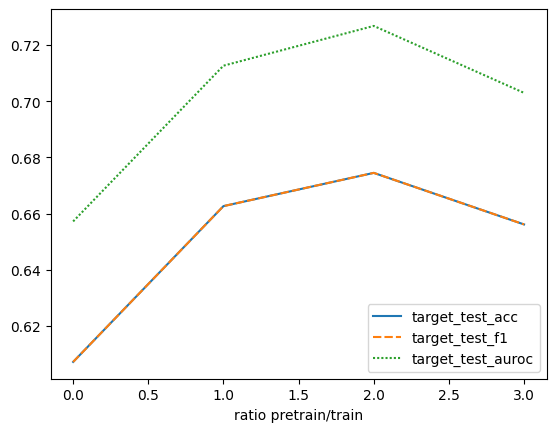

In [60]:
sns.lineplot(xd)

In [53]:
df = pd.read_csv("results/results.csv")
df["lab_shifts"] = df["lab_shifts"].str.slice(start=1,stop=-1).astype("category")
df

,dataset,fold_number,decoder,seed_sts,seed_label,batch_size,window_size,lab_shifts,nframes_tra,nframes_pre,...,aux_nepochs,pre_val_acc,pre_val_f1,pre_val_auroc,pre_test_acc,pre_test_f1,pre_test_auroc,pre_best_model,pre_train_csv,pre_nepochs
0,GunPoint,0,CNN,0,0,128,5,0,10000,40000,...,9,0.838825,0.838825,0.852924,0.646570,0.646570,0.714243,training/auto/0_0_2023-02-01_11-26/logs/pre/ch...,training/auto/0_0_2023-02-01_11-26/logs/pre/me...,122
1,GunPoint,0,CNN,0,0,128,5,0,10000,40000,...,6,0.841496,0.841496,0.857805,0.636455,0.636455,0.712427,training/auto/0_1_2023-02-01_11-37/logs/pre/ch...,training/auto/0_1_2023-02-01_11-37/logs/pre/me...,96
2,GunPoint,0,CNN,0,0,128,5,0.15,10000,40000,...,15,0.840012,0.840012,0.856416,0.637757,0.637757,0.714550,training/auto/0_2_2023-02-01_11-48/logs/pre/ch...,training/auto/0_2_2023-02-01_11-48/logs/pre/me...,100
3,GunPoint,0,CNN,0,0,128,5,0.15,10000,40000,...,7,0.831998,0.831998,0.852894,0.637957,0.637957,0.705994,training/auto/0_3_2023-02-01_11-59/logs/pre/ch...,training/auto/0_3_2023-02-01_11-59/logs/pre/me...,74


In [54]:
df.groupby("lab_shifts")[["def_test_f1", "pre_test_f1"]].mean()

,def_test_f1,pre_test_f1
lab_shifts,,
0,0.635103,0.641512
0.15,0.625538,0.637857


0.6320480704307556 0.6465698480606079


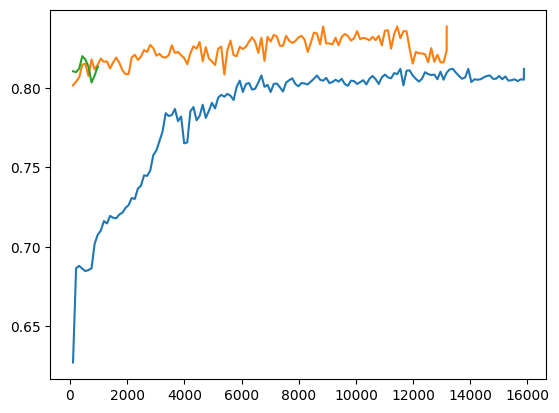

In [21]:
df_def = pd.read_csv("training/auto/0_0_2023-02-01_11-26/logs/def/metrics.csv")
df_aux = pd.read_csv("training/auto/0_0_2023-02-01_11-26/logs/aux/metrics.csv")
df_pre = pd.read_csv("training/auto/0_0_2023-02-01_11-26/logs/pre/metrics.csv")
df_def["val_f1"].dropna().plot()
df_pre["val_f1"].dropna().plot()
df_aux["val_f1"].dropna().plot()
print(df_def["test_f1"].max(), df_pre["test_f1"].max())

0.6381572484970093 0.636454701423645


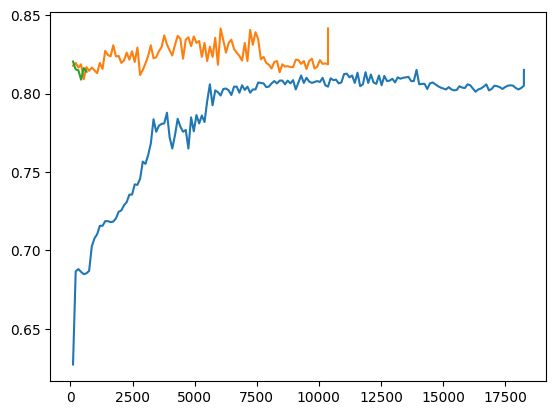

In [23]:
df_def = pd.read_csv("training/auto/0_1_2023-02-01_11-37/logs/def/metrics.csv")
df_aux = pd.read_csv("training/auto/0_1_2023-02-01_11-37/logs/aux/metrics.csv")
df_pre = pd.read_csv("training/auto/0_1_2023-02-01_11-37/logs/pre/metrics.csv")
df_def["val_f1"].dropna().plot()
df_pre["val_f1"].dropna().plot()
df_aux["val_f1"].dropna().plot()
print(df_def["test_f1"].max(), df_pre["test_f1"].max())